# 4ª Lista de Aprendizado de Máquina
## FeedForward Neural Network

Aluno: | Hugo Silva de Vasconcelos
----|----
Matrícula: | 180102028
Dataset: | [Wine](http://archive.ics.uci.edu/dataset/109/wine)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('wine.data', header=None, names=('Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'))

## Análise Exploratória pelos dados do Dataset

In [3]:
print("Quantidade de linhas e colunas do Dataset")
print(df.shape)
print("\n\nInformações Gerais do Dataset")
print(df.info())
print("\n\nEstatísticas Descritivas do Dataset")
print(df.describe())
print("\n\nAmostra do Dataset")
df.head()

Quantidade de linhas e colunas do Dataset
(178, 14)


Informações Gerais do Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-n

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
print("Valores nulos")
print(df.isnull().sum())
print("\n\nValores NA")
print(df.isna().sum())
print("\n\nValores zeros")
print((df == 0).astype(int).sum(axis=0))

Valores nulos
Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


Valores NA
Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: i

## Normalização dos dados

In [5]:
#Mapeia as classes para 0, 1 e 2
df['Class label'] = df['Class label'].map({1:0, 2:1, 3:2})

In [6]:
def normaliza(column):
    mean = column.mean()
    std = column.std()
    return (column - mean) / std

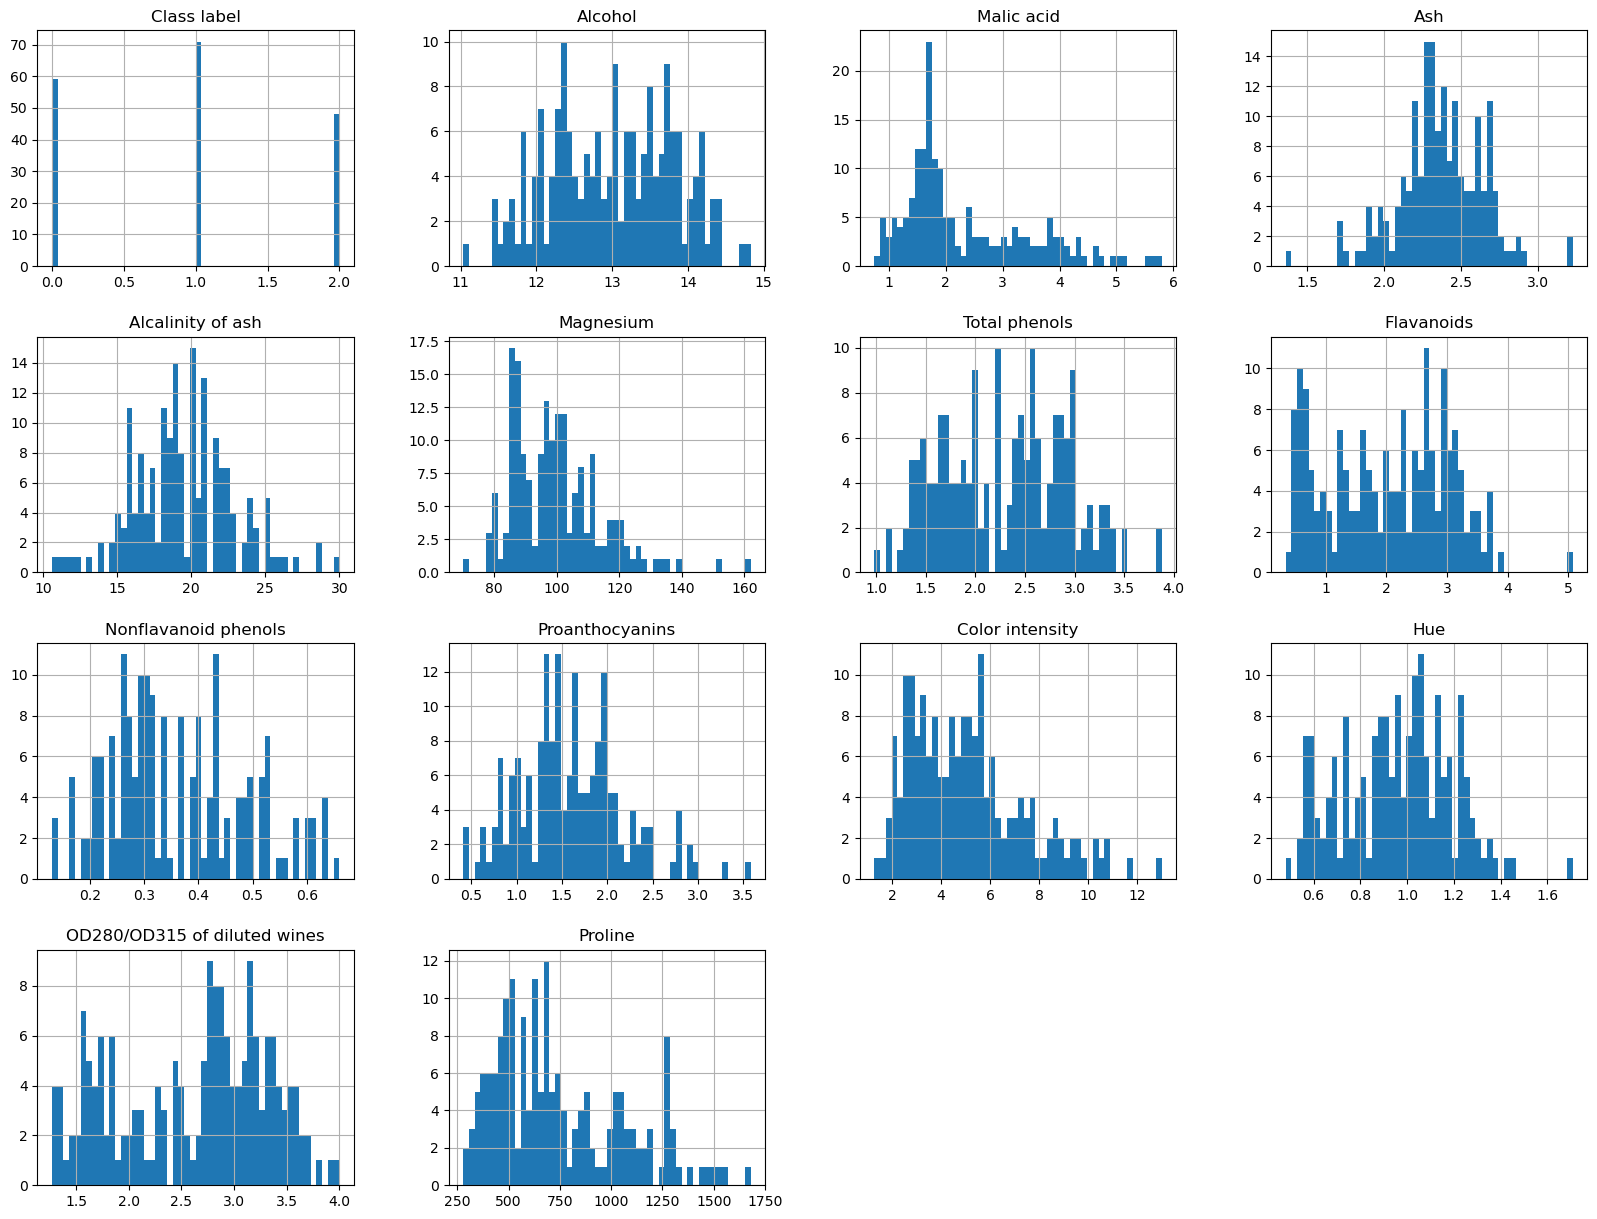

In [7]:
#Print distribuição dos dados
df.hist(bins=50, figsize=(20,15))
plt.show()


In [8]:
#Normaliza os dados
df['Alcohol'] = normaliza(df['Alcohol'])
df['Malic acid'] = normaliza(df['Malic acid'])
df['Ash'] = normaliza(df['Ash'])
df['Alcalinity of ash'] = normaliza(df['Alcalinity of ash'])
df['Magnesium'] = normaliza(df['Magnesium'])
df['Total phenols'] = normaliza(df['Total phenols'])
df['Flavanoids'] = normaliza(df['Flavanoids'])
df['Nonflavanoid phenols'] = normaliza(df['Nonflavanoid phenols'])
df['Proanthocyanins'] = normaliza(df['Proanthocyanins'])
df['Color intensity'] = normaliza(df['Color intensity'])
df['Hue'] = normaliza(df['Hue'])
df['OD280/OD315 of diluted wines'] = normaliza(df['OD280/OD315 of diluted wines'])
df['Proline'] = normaliza(df['Proline'])

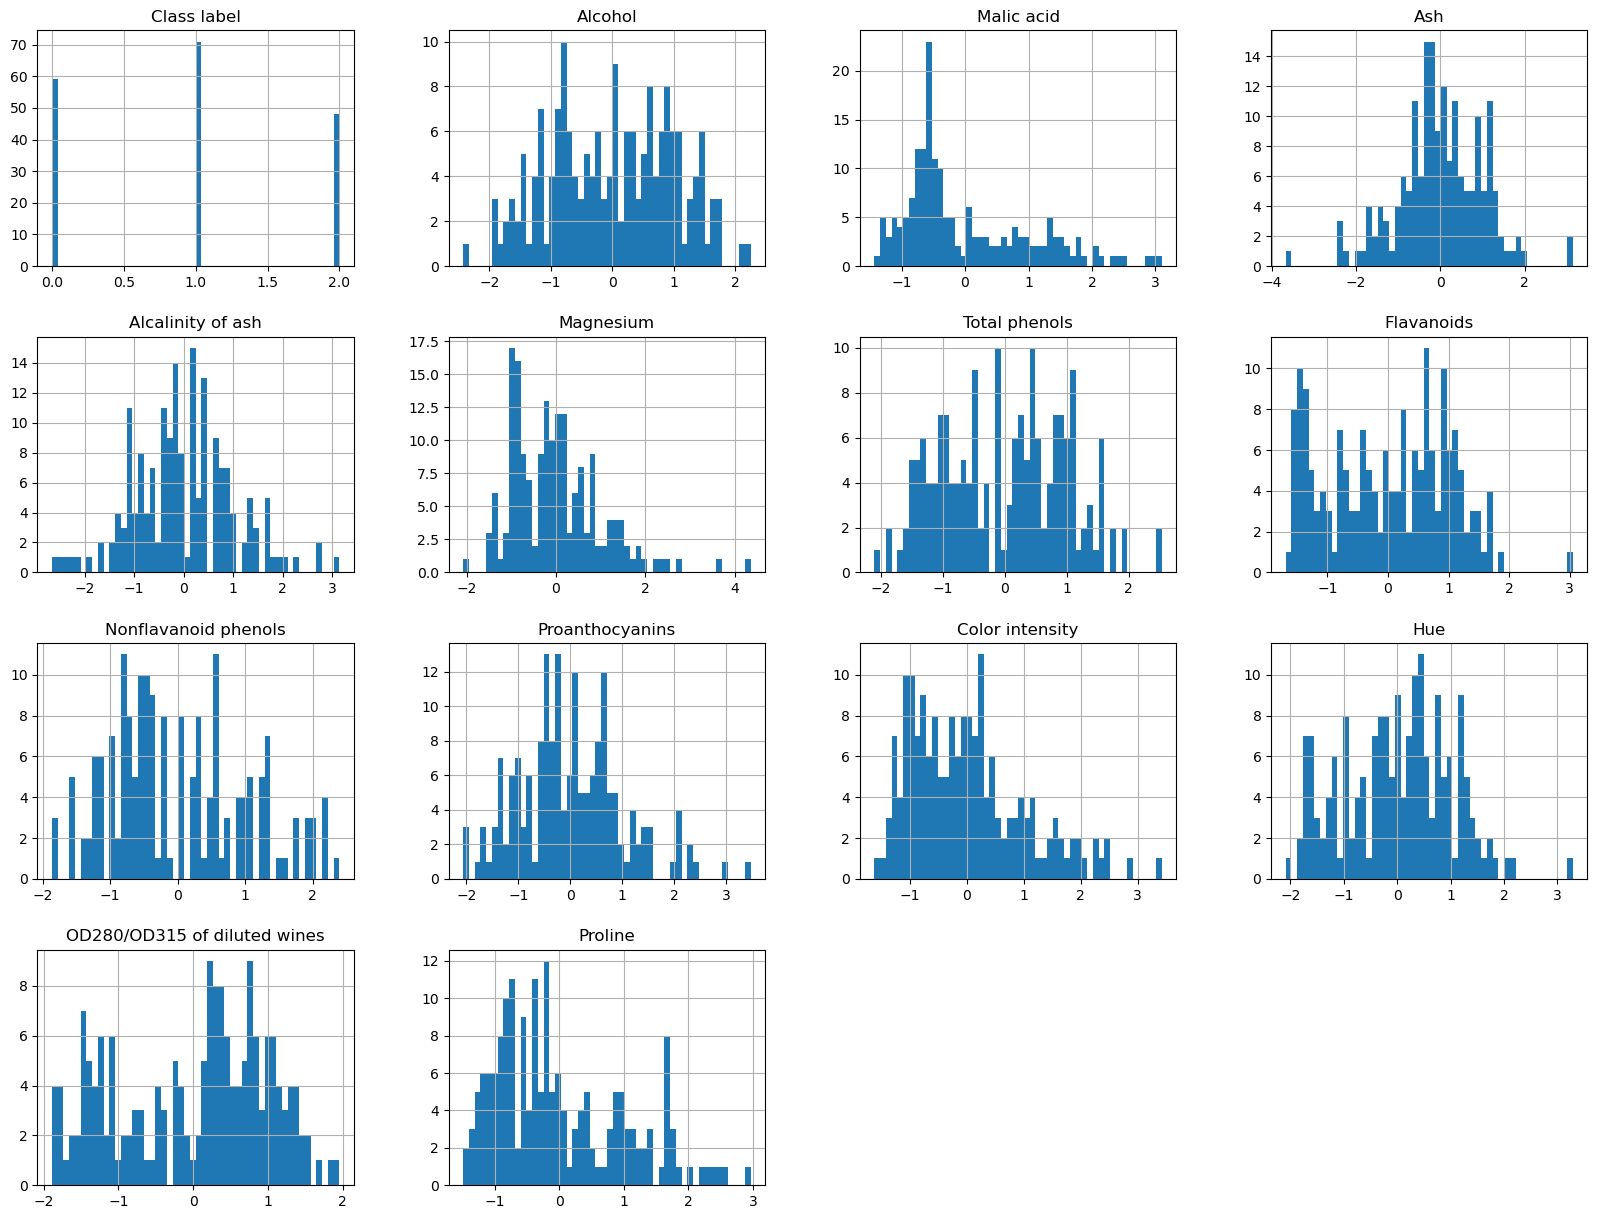

In [9]:
#Print distribuição dos dados
df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
#Salva o dataset normalizado
df.to_csv('wine_normalizado.csv', index=False)

In [11]:
import torch
from sklearn.model_selection import train_test_split
import math

### Preparação dos dados para o treinamento do modelo
1. Transformar o dataset em um tensor
2. Separar o dataset em treino e teste
3. Criar um modelo
  1. Definir a arquitetura da rede neural
  2. Definir a função de perda
  3. Definir o otimizador
  4. Definir as métricas
4. Treinar o modelo
5. Avaliar o modelo


### Transformação do dataset em um tensor e separação em treino, validação e teste:

In [12]:
#Transforma o dataframe em um tensor
tensor = torch.tensor(df.values, dtype=torch.float)

print(tensor.shape)

#Separa classe y presente na coluna 0 do tensor e o resto das colunas em x
y = tensor[:,0]
x = tensor[:,1:]

print(y.shape)
print(x.shape)

#Divide o dataset em treino, validação e teste
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=.4)

x_train, x_val, x_test, y_train, y_val, y_test = map(torch.tensor, (x_train, x_val, x_test, y_train, y_val, y_test))

print('x_train', x_train.shape)
print('x_val', x_val.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_val', y_val.shape)
print('y_test',y_test.shape)


torch.Size([178, 14])
torch.Size([178])
torch.Size([178, 13])
x_train torch.Size([124, 13])
x_val torch.Size([32, 13])
x_test torch.Size([22, 13])
y_train torch.Size([124])
y_val torch.Size([32])
y_test torch.Size([22])


/tmp/ipykernel_23175/3129266226.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train, x_val, x_test, y_train, y_val, y_test = map(torch.tensor, (x_train, x_val, x_test, y_train, y_val, y_test))


### Função de perda
Para a função de perda utiliza-se a função cross_entropy da biblioteca PyTorch. A função cross_entropy é uma combinação da função log_softmax e da função NLLLoss (Negative Log Likelihood Loss). A função log_softmax é uma função de ativação que normaliza os valores de entrada para que eles fiquem entre 0 e 1. A função NLLLoss é uma função de perda que calcula o erro entre a saída da rede neural e o valor esperado.

In [13]:
import torch.nn.functional as F

loss_func = F.cross_entropy

### Definição do modelo
O modelo foi definido com uma camada de entrada com 13 neurônios (Sabendo que a quantidade de parâmetros de treino são 13), uma camada oculta com 8 neurônios e uma camada de saída com 3 neurônios. A função de ativação utilizada foi a ReLU (Rectified Linear Unit) que retorna o valor de entrada se ele for maior que 0 e 0 caso contrário. Na saída foi utilizada a função softmax que retorna a probabilidade de cada classe.

In [14]:
from torch import nn

qnt_parameters = x_train.shape[1]

class WineModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(qnt_parameters, 8)
        self.linear2 = nn.Linear(8, 3)
    def forward(self, xb):
        # return self.linear1(xb)
        xb = self.linear1(xb)
        xb = F.relu(xb)
        xb = self.linear2(xb)
        xb = F.softmax(xb, dim=1)
        return xb

### Treinamento do modelo

In [15]:
epochs = 25
batch_size = 7
def fit(model, x_train, y_train, x_val, y_val, epochs, batch_size, learning_rate):
    for epoch in range(epochs):
        for i in range((x_train.shape[0] - 1) // batch_size + 1):
            start_i = i * batch_size
            end_i = start_i + batch_size
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            pred = model(xb)
            loss = loss_func(pred, yb.long())
            loss.backward()
            with torch.no_grad():
                for param in model.parameters():
                    param -= learning_rate * param.grad
                model.zero_grad()

Função auxiliar para retornar a função de perda do modelo ao longo das épocas de treinamento

In [16]:
def historical_fit(max_epochs, x_train, y_train, x_val, y_val):
    learning_rate = 1e-1
    train_losses = []
    val_losses = []
    for epochs in range(max_epochs, ):
        print("Epoch {}/{}".format(epochs, max_epochs))
        # Cria uma nova instância do modelo reinstanciando os pesos
        model = WineModel()
        fit(model, x_train, y_train, x_val, y_val, epochs, batch_size, learning_rate)
        train_losses.append(loss_func(model(x_train), y_train.long()))
        val_losses.append(loss_func(model(x_val), y_val.long()))
    return train_losses, val_losses, model

## Avaliação do modelo

### Avaliação do modelo por quantidade de épocas


Epoch 0/25
Epoch 1/25
Epoch 2/25
Epoch 3/25
Epoch 4/25
Epoch 5/25
Epoch 6/25


Epoch 7/25
Epoch 8/25
Epoch 9/25
Epoch 10/25
Epoch 11/25
Epoch 12/25
Epoch 13/25
Epoch 14/25
Epoch 15/25
Epoch 16/25
Epoch 17/25
Epoch 18/25
Epoch 19/25
Epoch 20/25
Epoch 21/25
Epoch 22/25
Epoch 23/25
Epoch 24/25


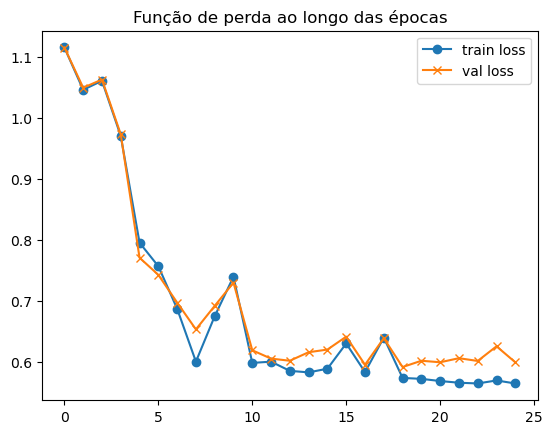

In [17]:
train_losses, val_losses, model = historical_fit(epochs, x_train, y_train, x_val, y_val)

train_losses = list(map(lambda x: np.array(x.detach()), train_losses))
val_losses = list(map(lambda x: np.array(x.detach()), val_losses))

plt.plot(train_losses, label='train loss', marker='o')
plt.plot(val_losses, label='val loss', marker='x')
plt.title('Função de perda ao longo das épocas')
plt.legend()
plt.show()

### Obtenção das métricas de avaliação do modelo

Função de Perda Treino x Função de Perda Validação: 
tensor(0.5641, grad_fn=<NllLossBackward0>)  x  tensor(0.5989, grad_fn=<NllLossBackward0>)
Pred Shape:  torch.Size([22, 3])
Pred[0]:  tensor([0.9934, 0.0053, 0.0013], grad_fn=<SelectBackward0>)
Argmax.Pred[0]:  tensor(0)
y_test[0] tensor(0.)
[[12  0  0]
 [ 0  4  0]
 [ 0  0  6]]


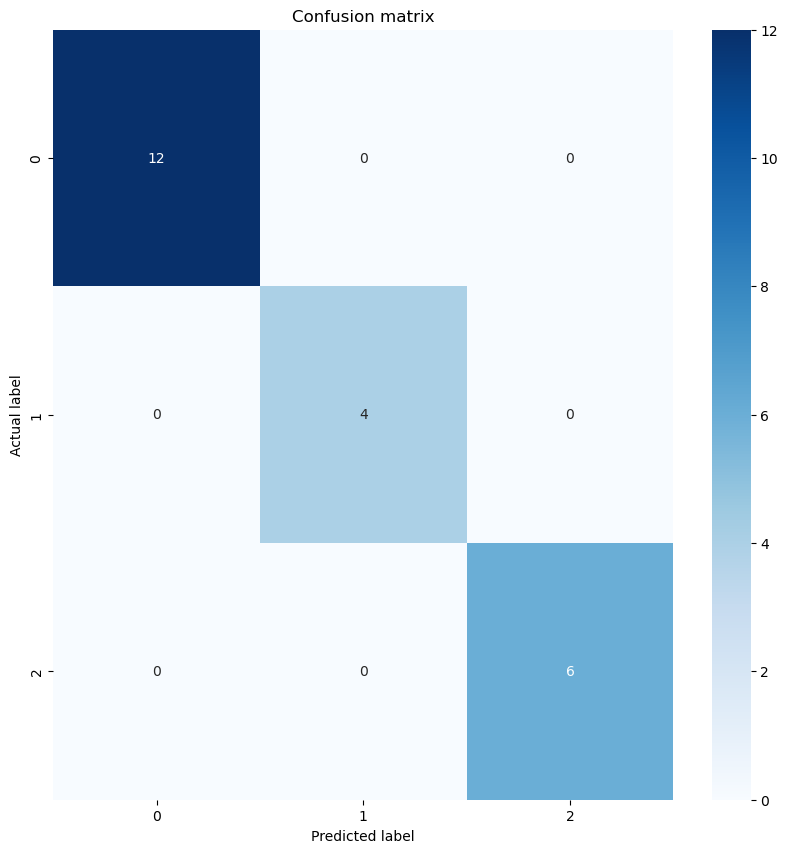

Acurácia: 1.0


In [18]:
print('Função de Perda Treino x Função de Perda Validação: ')
print(loss_func(model(x_train.float()), y_train.long()), ' x ', loss_func(model(x_val.float()), y_val.long()))

#Teste do modelo
pred = model(x_test)
print('Pred Shape: ', pred.shape)
print('Pred[0]: ', pred[0])
print('Argmax.Pred[0]: ', torch.argmax(pred[0]))
print('y_test[0]', y_test[0])

#Matriz de confusão
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = torch.argmax(pred, dim=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

#Plot da matriz de confusão
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#Acurácia
from sklearn.metrics import accuracy_score

print("Acurácia:", accuracy_score(y_test, y_pred))



In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['1', '2', '3']))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         6

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



### Resultados

Conforme observa-se no gráfico `Função de perda ao longo das épocas`, nota-se que a função de perda diminui considerávelmente nas primeiras 10 epocas, e apartir dessa tem um decrescimento razoavelmente baixo, indicando que o modelo já está convergindo para um resultado satisfatório.

Observando as métricas obtidas no treinamento do modelo, nota-se que a acurácia do modelo é de 100% e a perda é de aproximadamento 0.6, o que indica que o modelo está com um resultado satisfatório.